---
# Linear Regression Assignment
----

---
## Problem Statement :

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    1. Which variables are significant in predicting the demand for shared bikes.
    2. How well those variables describe the bike demands


In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

In [3]:
#import plot libraries
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
# libraries
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Step 1 : Reading and Understanding the Dataset

In [6]:
bike_df = pd.read_csv('day.csv')

In [7]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
bike_df.shape

(730, 16)

In [9]:
# bike dataset has 730 rows and 16 cols

In [10]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [12]:
# checking for the null values in column data

bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Step 2 : Data Cleaning:

    . Drop Null columns
    . Drop COlumns that are not useful

    1. instant:as it is the record index
    2. dteday: as the features of date are alreeady there like yr month and weekday
    3. casual and registered as the are in cnt, because cnt is sum of both the values

In [13]:
df = bike_df.copy()
# now df contains are dataset on which we will build a model

In [14]:
df.shape

(730, 16)

In [15]:
df.drop(['instant'],axis=1,inplace=True)
 # insttant is basically a index of each rows , we can drop this as no such signifiance in building the model

In [16]:
df.drop(['dteday'],axis=1,inplace=True)
 # dteday is not useful as it is showing dates which we can get it from month , weekdays etc..

In [17]:
df.drop(['casual'],axis=1,inplace=True)
df.drop(['registered'],axis=1,inplace=True)

#Removing casual and registered as cnt is sum of these

### inscpecting Data after drop

In [18]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
df.shape

(730, 12)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [21]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [22]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [23]:
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


So from the above correlation formed we can clearly see that season,month and weekday which are supposed to be non-numerical are numerical which should be changed



In [24]:
# Encoding/mapping the season column

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [25]:
# Encoding/mapping the month column

df.mnth = df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})


In [26]:
# Encoding/mapping the weekday column

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [27]:
# Encoding/mapping the weathersit column

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [28]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


####  Handling Outliers

In [29]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

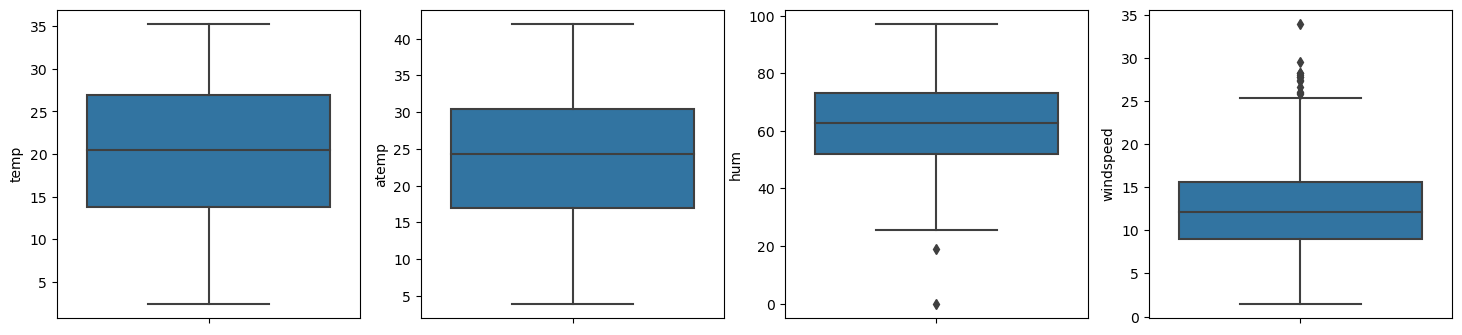

In [30]:
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_df)
    i+=1

From above plot we can derive that there no such outliers present in the data set

### Drawing pairplots to check for linear relationship
---

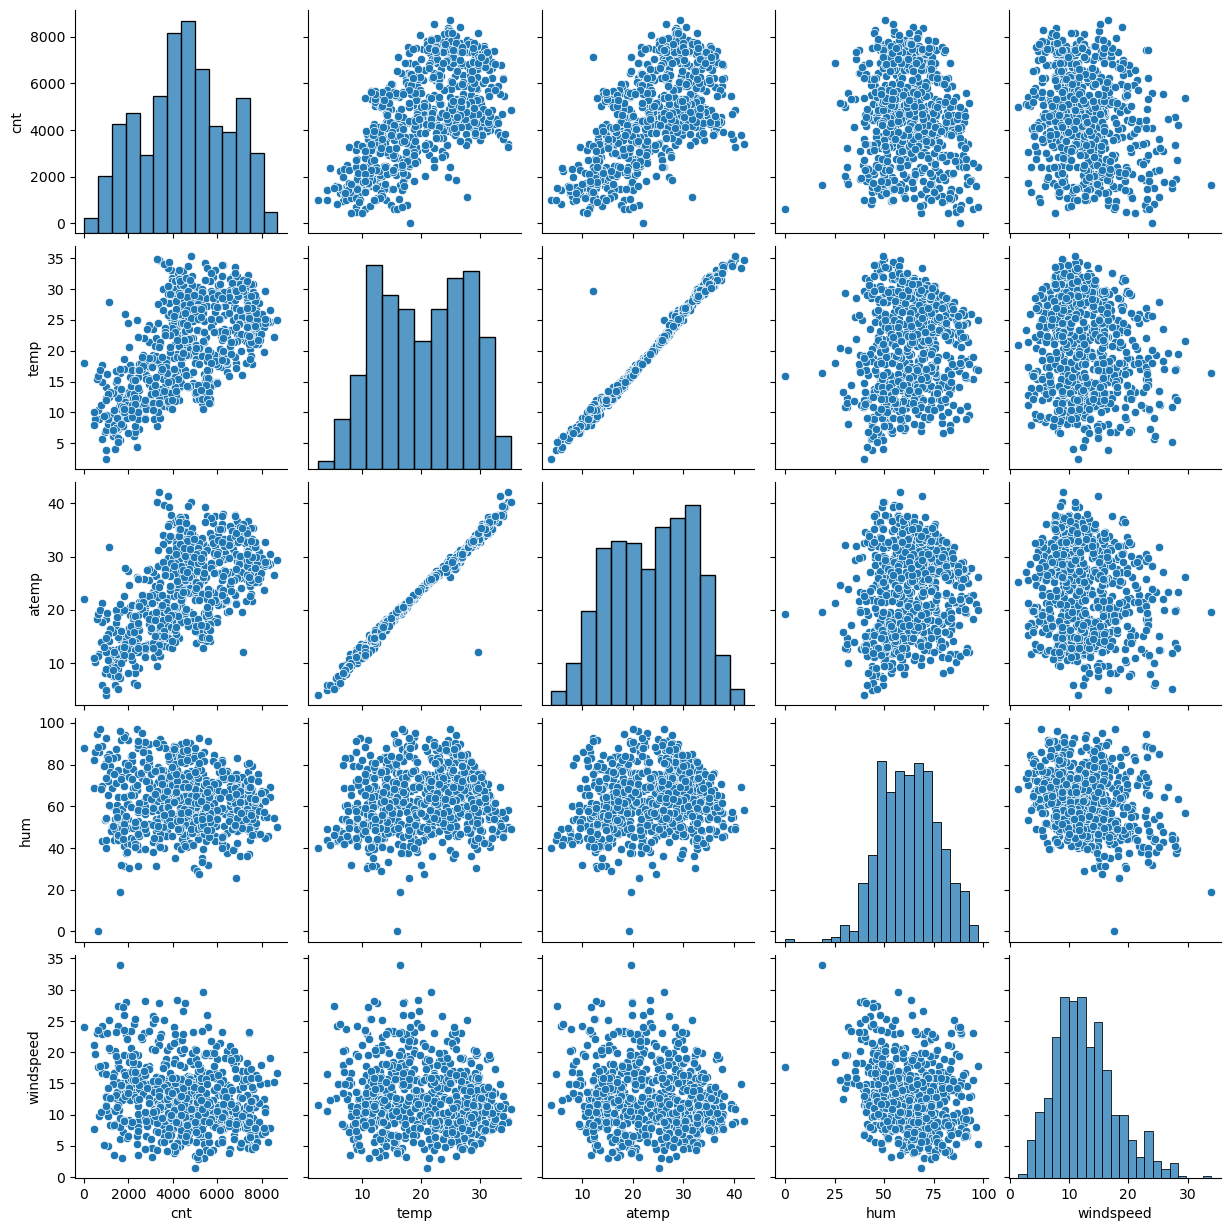

In [31]:
sns.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

    . So from the above plots we can clearly conclude that temp and atemp are having high correlation
    . from the plots we can also say that there is a linear relationship between TEMP and ATEMP

## Step 3:  Visualising data to find correlation from numerical variables


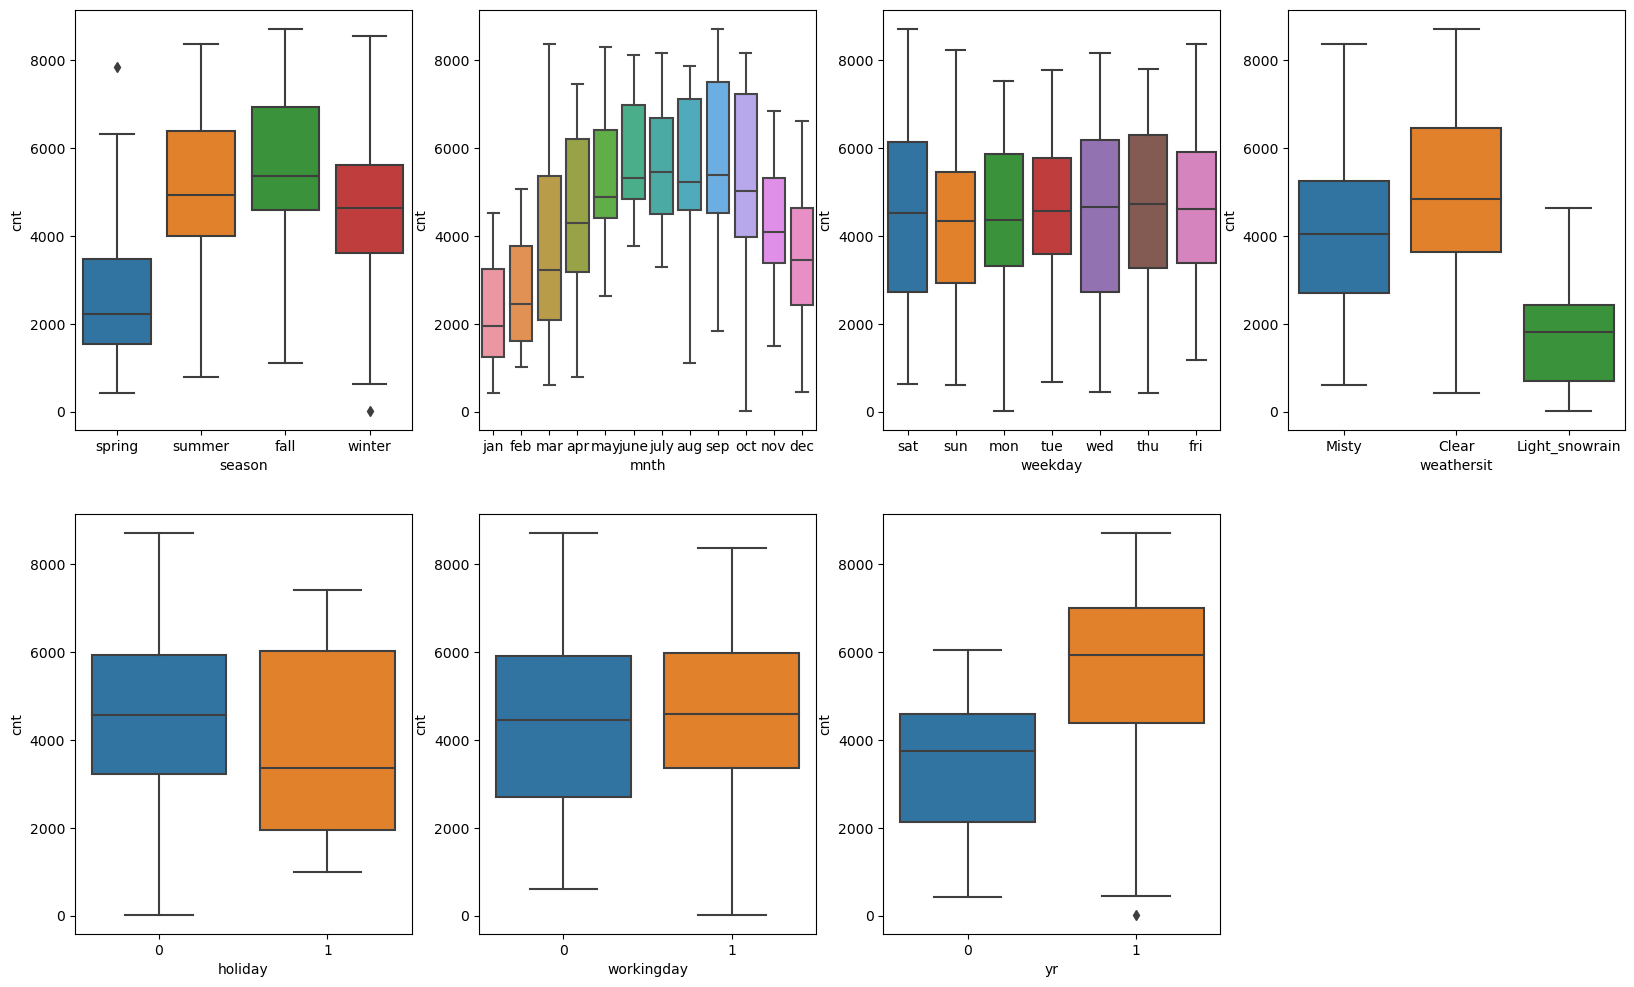

In [32]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

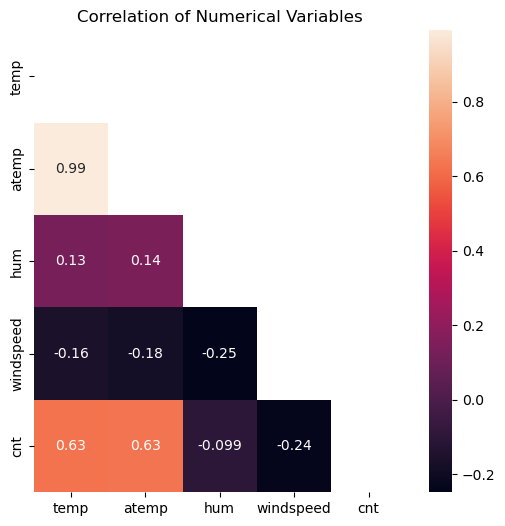

In [33]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, mask=matrix)
plt.title("Correlation of Numerical Variables")
plt.show()

# Step 4 : Data preparation for linar regression

Creating dummy variables for categorical variables

In [34]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.mnth,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [35]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [36]:
# Merging  the dataframe, with the dummy variable dataset. 

df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [37]:
df_new.shape

(730, 34)

In [38]:
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,True,False,False,False,False,False,True,True,False,False
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,False,True,False,False,False,False,True,True,False,False
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,False,False,False,False,False,False,False,True,False,False
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,False,False,False,True,False,False,False,True,False,False
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,False,False,False,False,True,False,False,True,False,False


In [39]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    bool   
 13  dec             730 non-null    bool   
 14  feb             730 non-null    bool   
 15  jan             730 non-null    bool   
 16  july            730 non-null    bool   
 17  june            730 non-null    boo

In [40]:
# dropping columns where we have already created dummy variable out of it.

df_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [41]:
df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,False,False,...,True,False,False,False,False,False,True,True,False,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,False,False,...,False,True,False,False,False,False,True,True,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,...,False,False,False,True,False,False,False,True,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,...,False,False,False,False,True,False,False,True,False,False


In [42]:
df_new.shape

(730, 30)

In [43]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    bool   
 9   dec             730 non-null    bool   
 10  feb             730 non-null    bool   
 11  jan             730 non-null    bool   
 12  july            730 non-null    bool   
 13  june            730 non-null    bool   
 14  mar             730 non-null    bool   
 15  may             730 non-null    bool   
 16  nov             730 non-null    bool   
 17  oct             730 non-null    boo

In [44]:
df_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov',
       'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

#### making split of bike dataset for Traing and Testing Data Set

In [45]:
#y to contain only target variable
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [46]:
# check the shape of training datatset

df_train.shape

(510, 30)

In [47]:
# Checking shape and size test

df_test.shape

(220, 30)

In [48]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [49]:
# verifying the head of dataset before scaling.

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,False,False,...,False,False,False,True,False,False,False,False,False,False
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,False,False,...,True,False,False,False,False,False,True,True,False,False
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,False,True,...,False,True,False,False,False,False,False,True,False,False
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,False,False,...,True,False,False,False,False,False,True,False,True,False
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,False,False,...,False,False,False,False,False,False,True,False,True,False


In [50]:
# Let us scale continuous variables
# Apply scaler() to all the columns except the 'bool' and 'dummy' variables

num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [51]:
# verifying the head after appying scaling.

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,False,False,...,False,False,False,True,False,False,False,False,False,False
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,False,False,...,True,False,False,False,False,False,True,True,False,False
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,False,True,...,False,True,False,False,False,False,False,True,False,False
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,False,False,...,True,False,False,False,False,False,True,False,True,False
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,False,False,...,False,False,False,False,False,False,True,False,True,False


In [52]:
# describing the dataset

df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


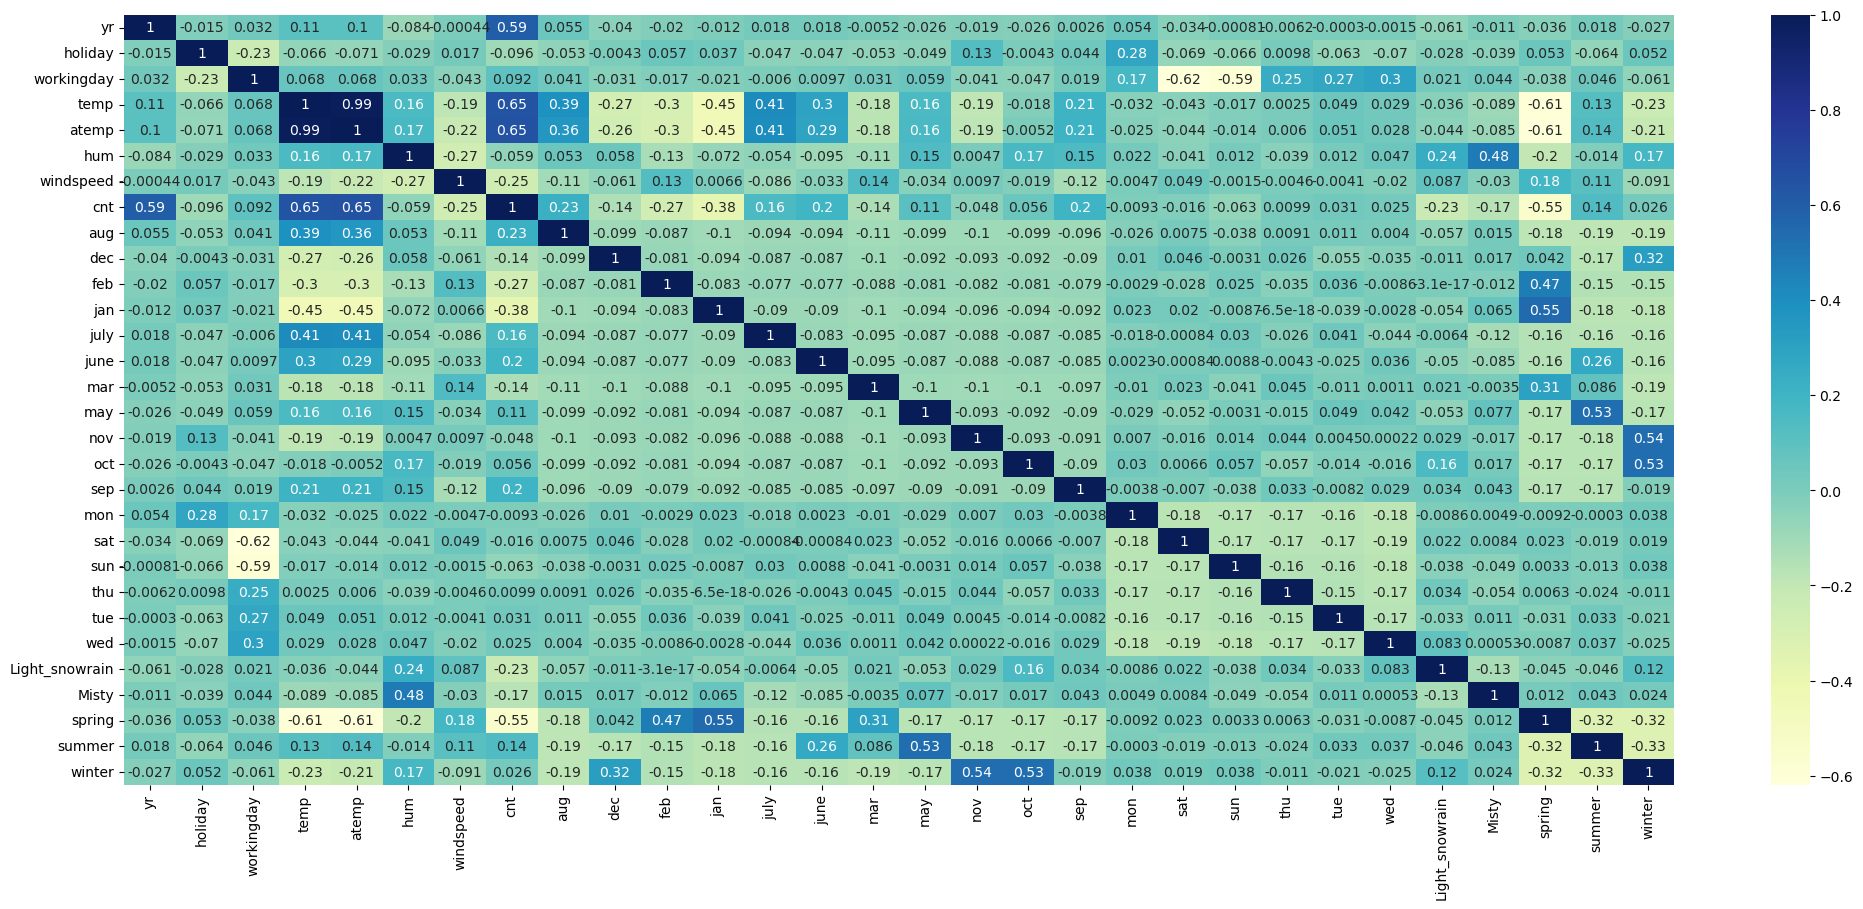

In [53]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

cnt seems to have correlation with year variable and temp , atemp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

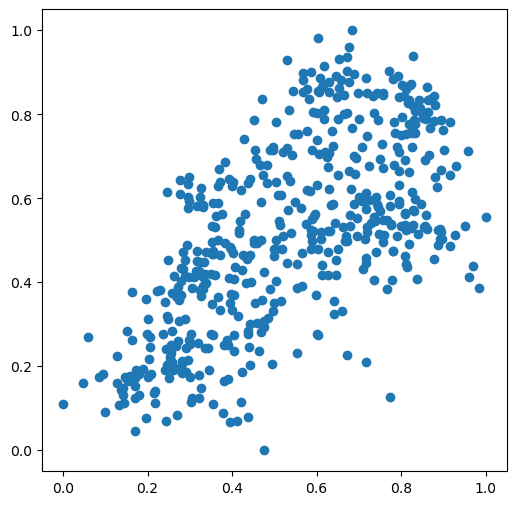

In [54]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

from above plot we can conclude that A positive corelation between temp and cnt

## Step 5 : Building a Model
---

In [55]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov',
       'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

##### Dividing into X and Y sets for the model building


In [56]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [57]:
# Recursive feature elimination 

X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [58]:
lr.params

const    0.169031
temp     0.640944
dtype: float64

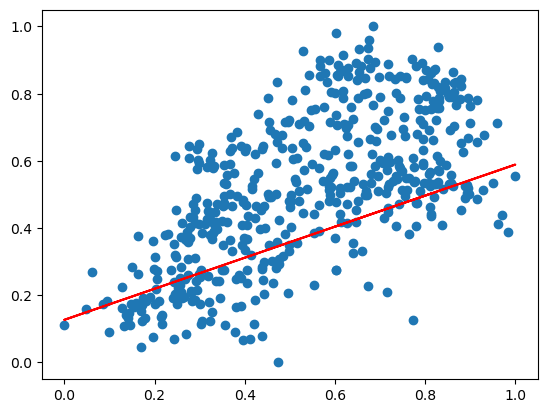

In [59]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [60]:
# Print a summary of the linear regression model obtained
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           2.46e-61
Time:                        06:32:37   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Adding another variable

The R-squared value obtained is `0.416`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `year`.

In [61]:
# Assign yr the feature variables to X
X_train_lm = X_train[['temp', 'yr']]

In [62]:
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.079266
temp     0.584266
yr       0.236739
dtype: float64

In [63]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          3.34e-130
Time:                        06:32:37   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
yr             0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# Assign atemp the feature variables to X
X_train_lm = X_train[['temp', 'yr','atemp']]

In [65]:
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.072045
temp     0.079760
yr       0.237193
atemp    0.542002
dtype: float64

In [66]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     388.0
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          9.71e-131
Time:                        06:32:38   Log-Likelihood:                 343.36
No. Observations:                 510   AIC:                            -678.7
Df Residuals:                     506   BIC:                            -661.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0720      0.015      4.813      0.000       0.043       0.101
temp           0.0798      0.169      0.473      0.636      -0.252       0.411
yr             0.2372      0.011     21.485      0.000       0.216       0.259
atemp          0.5420      0.179      3.024      0.003       0.190       0.894
==============================================================================
Omnibus:                       38.557   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.381
Skew:                          -0.555   Prob(JB):                     3.47e-13
Kurtosis:                       4.212   Cond. No.                         61.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Adding all the variables to the model

In [67]:
# Check all the columns of the dataframe

df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [68]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              510 non-null    int64  
 1   holiday         510 non-null    int64  
 2   workingday      510 non-null    int64  
 3   temp            510 non-null    float64
 4   atemp           510 non-null    float64
 5   hum             510 non-null    float64
 6   windspeed       510 non-null    float64
 7   aug             510 non-null    bool   
 8   dec             510 non-null    bool   
 9   feb             510 non-null    bool   
 10  jan             510 non-null    bool   
 11  july            510 non-null    bool   
 12  june            510 non-null    bool   
 13  mar             510 non-null    bool   
 14  may             510 non-null    bool   
 15  nov             510 non-null    bool   
 16  oct             510 non-null    bool   
 17  sep             510 non-null    bool  

In [69]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,False,False,False,...,False,False,False,True,False,False,False,False,False,False
426,1,0,0,0.442393,0.438975,0.640189,0.255342,False,False,False,...,True,False,False,False,False,False,True,True,False,False
728,1,0,0,0.245101,0.200348,0.498067,0.663106,False,True,False,...,False,True,False,False,False,False,False,True,False,False
482,1,0,0,0.395666,0.391735,0.504508,0.188475,False,False,False,...,True,False,False,False,False,False,True,False,True,False
111,0,0,1,0.345824,0.318819,0.751824,0.380981,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [70]:
X_train.replace({False: 0, True: 1}, inplace=True)

In [71]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [72]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const             0.243298
yr                0.232539
holiday           0.010892
workingday        0.096273
temp              0.387984
atemp             0.059045
hum              -0.152016
windspeed        -0.183604
aug               0.022270
dec              -0.044274
feb              -0.032316
jan              -0.063064
july             -0.032657
june              0.006012
mar               0.001555
may               0.025541
nov              -0.039818
oct               0.007713
sep               0.086761
mon              -0.021624
sat               0.095176
sun               0.040957
thu              -0.009730
tue              -0.018439
wed              -0.005897
Light_snowrain   -0.254975
Misty            -0.059521
spring           -0.045355
summer            0.042369
winter            0.107081
dtype: float64

In [73]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.81e-180
Time:                        06:32:38   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2433      0.035      6.887      0.000       0.174       0.313
yr                 0.2325      0.008     28.794      0.000       0.217       0.248
holiday            0.0109      0.024      0.451      0.652      -0.037       0.058
workingday         0.0963      0.012      7.835      0.000       0.072       0.120
temp               0.3880      0.142      2.727      0.007       0.108       0.668
atemp              0.0590      0.138      0.426      0.670      -0.213       0.331
hum               -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed         -0.1836      0.026     -6.962      0.000      -0.235      -0.132
aug                0.0223      0.034      0.657      0.511      -0.044       0.089
dec               -0.0443      0.034     -1.316      0.189      -0.110       0.022
feb               -0.0323      0.033     -0.980      0.327      -0.097       0.032
jan               -0.0631      0.034     -1.876      0.061      -0.129       0.003
july              -0.0327      0.035     -0.931      0.352      -0.102       0.036
june               0.0060      0.025      0.241      0.810      -0.043       0.055
mar                0.0016      0.025      0.063      0.950      -0.047       0.050
may                0.0255      0.021      1.208      0.228      -0.016       0.067
nov               -0.0398      0.036     -1.093      0.275      -0.111       0.032
oct                0.0077      0.036      0.215      0.830      -0.063       0.078
sep                0.0868      0.032      2.711      0.007       0.024       0.150
mon               -0.0216      0.015     -1.401      0.162      -0.052       0.009
sat                0.0952      0.014      6.910      0.000       0.068       0.122
sun                0.0410      0.014      2.929      0.004       0.013       0.068
thu               -0.0097      0.016     -0.623      0.534      -0.040       0.021
tue               -0.0184      0.016     -1.184      0.237      -0.049       0.012
wed               -0.0059      0.015     -0.394      0.694      -0.035       0.023
Light_snowrain    -0.2550      0.026     -9.631      0.000      -0.307      -0.203
Misty             -0.0595      0.010     -5.701      0.000      -0.080      -0.039
spring            -0.0454      0.030     -1.511      0.131      -0.104       0.014
summer             0.0424      0.026      1.617      0.107      -0.009       0.094
winter             0.1071      0.028      3.826      0.000       0.052       0.162
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:                          -0.805   Prob(JB):                     1.11e-51
Kurtosis:                   

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [74]:
# Generic function to calculate VIF of variables

def fn_calcVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 3)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [75]:
fn_calcVIF(X_train)

,Features,VIF
2,workingday,85.558
3,temp,66.897
4,atemp,56.028
19,sat,19.708
20,sun,18.343
26,spring,10.765
28,winter,9.461
27,summer,8.292
15,nov,6.788
7,aug,6.469


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `march` as it has a very high p-value of `0.950`. Let's go ahead and drop this variables

We could have

- High P-val and high VIF
- High -Low
    - High p, low VIF : remove these first
    - low p, high VIF : remove these after the one above
- low p and low VIF

In [76]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('mar', axis =1)

In [77]:
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.params

const             0.244077
yr                0.232536
holiday           0.011064
workingday        0.096478
temp              0.387730
atemp             0.058811
hum              -0.151818
windspeed        -0.183694
aug               0.021552
dec              -0.045623
feb              -0.033849
jan              -0.064649
july             -0.033333
june              0.005503
may               0.025071
nov              -0.041044
oct               0.006537
sep               0.085911
mon              -0.021612
sat               0.095393
sun               0.041141
thu              -0.009687
tue              -0.018435
wed              -0.005890
Light_snowrain   -0.254974
Misty            -0.059529
spring           -0.044746
summer            0.042051
winter            0.107410
dtype: float64

In [78]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.75e-181
Time:                        06:32:38   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     482   BIC:                            -879.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2441      0.033      7.380      0.000       0.179       0.309
yr                 0.2325      0.008     28.824      0.000       0.217       0.248
holiday            0.0111      0.024      0.462      0.645      -0.036       0.058
workingday         0.0965      0.012      8.151      0.000       0.073       0.120
temp               0.3877      0.142      2.729      0.007       0.109       0.667
atemp              0.0588      0.138      0.425      0.671      -0.213       0.330
hum               -0.1518      0.038     -3.950      0.000      -0.227      -0.076
windspeed         -0.1837      0.026     -6.983      0.000      -0.235      -0.132
aug                0.0216      0.032      0.676      0.499      -0.041       0.084
dec               -0.0456      0.026     -1.755      0.080      -0.097       0.005
feb               -0.0338      0.022     -1.517      0.130      -0.078       0.010
jan               -0.0646      0.022     -2.892      0.004      -0.109      -0.021
july              -0.0333      0.033     -0.999      0.318      -0.099       0.032
june               0.0055      0.024      0.233      0.816      -0.041       0.052
may                0.0251      0.020      1.268      0.205      -0.014       0.064
nov               -0.0410      0.031     -1.333      0.183      -0.102       0.019
oct                0.0065      0.031      0.213      0.831      -0.054       0.067
sep                0.0859      0.029      2.961      0.003       0.029       0.143
mon               -0.0216      0.015     -1.402      0.162      -0.052       0.009
sat                0.0954      0.013      7.159      0.000       0.069       0.122
sun                0.0411      0.014      3.011      0.003       0.014       0.068
thu               -0.0097      0.016     -0.622      0.535      -0.040       0.021
tue               -0.0184      0.016     -1.185      0.237      -0.049       0.012
wed               -0.0059      0.015     -0.394      0.694      -0.035       0.023
Light_snowrain    -0.2550      0.026     -9.641      0.000      -0.307      -0.203
Misty             -0.0595      0.010     -5.708      0.000      -0.080      -0.039
spring            -0.0447      0.028     -1.575      0.116      -0.101       0.011
summer             0.0421      0.026      1.637      0.102      -0.008       0.093
winter             0.1074      0.027      3.910      0.000       0.053       0.161
==============================================================================
Omnibus:                       84.449   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.878
Skew:                          -0.804   Prob(JB):                     9.93e-52
Kurtosis:                       5.910   Cond. No.                     1.55e+15
================================

In [79]:
# Calculate the VIFs again for the new model

fn_calcVIF(X)

,Features,VIF
2,workingday,74.904
3,temp,66.843
4,atemp,55.988
18,sat,17.213
19,sun,16.188
25,spring,9.657
27,winter,9.133
26,summer,7.986
7,aug,5.741
11,july,5.111


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `oct` has a significantly high p-value (`0.831`). Hence, this variable isn't of much use and should be dropped.

In [80]:
# dropping oct
X = X.drop('oct', axis =1)

In [81]:
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.68e-182
Time:                        06:32:38   Log-Likelihood:                 527.10
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2455      0.032      7.586      0.000       0.182       0.309
yr                 0.2325      0.008     28.873      0.000       0.217       0.248
holiday            0.0117      0.024      0.494      0.622      -0.035       0.058
workingday         0.0967      0.012      8.209      0.000       0.074       0.120
temp               0.3882      0.142      2.736      0.006       0.109       0.667
atemp              0.0589      0.138      0.427      0.670      -0.212       0.330
hum               -0.1511      0.038     -3.951      0.000      -0.226      -0.076
windspeed         -0.1835      0.026     -6.986      0.000      -0.235      -0.132
aug                0.0190      0.029      0.644      0.520      -0.039       0.077
dec               -0.0495      0.018     -2.687      0.007      -0.086      -0.013
feb               -0.0349      0.022     -1.608      0.108      -0.078       0.008
jan               -0.0657      0.022     -3.010      0.003      -0.109      -0.023
july              -0.0360      0.031     -1.161      0.246      -0.097       0.025
june               0.0043      0.023      0.187      0.852      -0.041       0.049
may                0.0246      0.020      1.253      0.211      -0.014       0.063
nov               -0.0462      0.019     -2.426      0.016      -0.084      -0.009
sep                0.0827      0.025      3.336      0.001       0.034       0.131
mon               -0.0217      0.015     -1.408      0.160      -0.052       0.009
sat                0.0956      0.013      7.210      0.000       0.070       0.122
sun                0.0414      0.014      3.051      0.002       0.015       0.068
thu               -0.0097      0.016     -0.625      0.532      -0.040       0.021
tue               -0.0185      0.016     -1.190      0.235      -0.049       0.012
wed               -0.0059      0.015     -0.396      0.693      -0.035       0.023
Light_snowrain    -0.2548      0.026     -9.648      0.000      -0.307      -0.203
Misty             -0.0596      0.010     -5.721      0.000      -0.080      -0.039
spring            -0.0460      0.028     -1.655      0.099      -0.101       0.009
summer             0.0400      0.024      1.684      0.093      -0.007       0.087
winter             0.1101      0.024      4.539      0.000       0.062       0.158
==============================================================================
Omnibus:                       83.679   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.048
Skew:                          -0.799   Prob(JB):                     6.74e-51
Kurtosis:                       5.884   Cond. No.                     1.53e+15
==============================================================================

Notes:
[1] Standard Errors assume t

In [82]:
# Calculate the VIFs again for the new model

fn_calcVIF(X)

,Features,VIF
2,workingday,72.289
3,temp,66.826
4,atemp,55.987
17,sat,16.599
18,sun,15.582
24,spring,9.257
26,winter,7.141
25,summer,6.836
7,aug,4.901
11,july,4.417


In [83]:
# dropping June , high p = 0.852

X = X.drop('june', axis =1)
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     112.0
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.55e-183
Time:                        06:32:38   Log-Likelihood:                 527.08
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -892.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2457      0.032      7.604      0.000       0.182       0.309
yr                 0.2323      0.008     29.009      0.000       0.217       0.248
holiday            0.0114      0.024      0.483      0.630      -0.035       0.058
workingday         0.0968      0.012      8.231      0.000       0.074       0.120
temp               0.3961      0.135      2.926      0.004       0.130       0.662
atemp              0.0554      0.137      0.405      0.685      -0.213       0.324
hum               -0.1520      0.038     -4.015      0.000      -0.226      -0.078
windspeed         -0.1841      0.026     -7.081      0.000      -0.235      -0.133
aug                0.0157      0.024      0.662      0.508      -0.031       0.062
dec               -0.0490      0.018     -2.690      0.007      -0.085      -0.013
feb               -0.0343      0.021     -1.599      0.110      -0.077       0.008
jan               -0.0648      0.021     -3.045      0.002      -0.107      -0.023
july              -0.0394      0.025     -1.598      0.111      -0.088       0.009
may                0.0229      0.017      1.319      0.188      -0.011       0.057
nov               -0.0459      0.019     -2.421      0.016      -0.083      -0.009
sep                0.0804      0.021      3.744      0.000       0.038       0.123
mon               -0.0216      0.015     -1.403      0.161      -0.052       0.009
sat                0.0959      0.013      7.264      0.000       0.070       0.122
sun                0.0416      0.014      3.079      0.002       0.015       0.068
thu               -0.0097      0.016     -0.624      0.533      -0.040       0.021
tue               -0.0185      0.016     -1.190      0.235      -0.049       0.012
wed               -0.0058      0.015     -0.390      0.697      -0.035       0.023
Light_snowrain    -0.2548      0.026     -9.657      0.000      -0.307      -0.203
Misty             -0.0595      0.010     -5.725      0.000      -0.080      -0.039
spring            -0.0474      0.027     -1.771      0.077      -0.100       0.005
summer             0.0393      0.023      1.677      0.094      -0.007       0.085
winter             0.1086      0.023      4.756      0.000       0.064       0.153
==============================================================================
Omnibus:                       83.300   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.416
Skew:                          -0.798   Prob(JB):                     2.51e-50
Kurtosis:                       5.864   Cond. No.                     1.53e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest ei

In [84]:
# Calculate the VIFs again for the new model

fn_calcVIF(X)

,Features,VIF
2,workingday,72.180
3,temp,60.919
4,atemp,54.958
16,sat,16.546
17,sun,15.538
23,spring,8.599
24,summer,6.659
25,winter,6.337
1,holiday,3.975
7,aug,3.192


In [85]:
# dropping 'wed' feature

X = X.drop('wed', axis =1)
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.52e-184
Time:                        06:32:38   Log-Likelihood:                 527.00
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     485   BIC:                            -898.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2450      0.032      7.601      0.000       0.182       0.308
yr                 0.2323      0.008     29.032      0.000       0.217       0.248
holiday            0.0099      0.023      0.423      0.672      -0.036       0.056
workingday         0.0949      0.011      8.853      0.000       0.074       0.116
temp               0.3987      0.135      2.952      0.003       0.133       0.664
atemp              0.0523      0.136      0.383      0.702      -0.216       0.320
hum               -0.1526      0.038     -4.036      0.000      -0.227      -0.078
windspeed         -0.1842      0.026     -7.091      0.000      -0.235      -0.133
aug                0.0158      0.024      0.665      0.506      -0.031       0.062
dec               -0.0490      0.018     -2.690      0.007      -0.085      -0.013
feb               -0.0343      0.021     -1.600      0.110      -0.076       0.008
jan               -0.0649      0.021     -3.053      0.002      -0.107      -0.023
july              -0.0392      0.025     -1.589      0.113      -0.088       0.009
may                0.0229      0.017      1.322      0.187      -0.011       0.057
nov               -0.0462      0.019     -2.444      0.015      -0.083      -0.009
sep                0.0803      0.021      3.742      0.000       0.038       0.122
mon               -0.0183      0.013     -1.415      0.158      -0.044       0.007
sat                0.0972      0.013      7.639      0.000       0.072       0.122
sun                0.0430      0.013      3.295      0.001       0.017       0.069
thu               -0.0064      0.013     -0.492      0.623      -0.032       0.019
tue               -0.0152      0.013     -1.162      0.246      -0.041       0.011
Light_snowrain    -0.2556      0.026     -9.719      0.000      -0.307      -0.204
Misty             -0.0592      0.010     -5.717      0.000      -0.080      -0.039
spring            -0.0475      0.027     -1.777      0.076      -0.100       0.005
summer             0.0391      0.023      1.672      0.095      -0.007       0.085
winter             0.1087      0.023      4.762      0.000       0.064       0.153
==============================================================================
Omnibus:                       82.771   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.939
Skew:                          -0.793   Prob(JB):                     5.26e-50
Kurtosis:                       5.857   Cond. No.                     1.52e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.34e-28. This might indicate that there are
strong multicollinearity p

In [86]:
fn_calcVIF(X)

,Features,VIF
2,workingday,70.217
3,temp,60.772
4,atemp,54.767
16,sat,16.520
17,sun,15.513
22,spring,8.597
23,summer,6.657
24,winter,6.337
1,holiday,3.918
7,aug,3.192


In [87]:
# dropping 'atemp' feature

X = X.drop('atemp', axis =1)
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())
fn_calcVIF(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.42e-185
Time:                        06:32:38   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2447      0.032      7.

,Features,VIF
2,workingday,70.182
15,sat,16.519
16,sun,15.511
21,spring,8.550
22,summer,6.601
23,winter,6.271
3,temp,4.921
1,holiday,3.908
6,aug,3.173
10,july,2.807


In [88]:
# dropping 'holiday' feature

X = X.drop('holiday', axis =1)
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())
fn_calcVIF(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.42e-185
Time:                        06:32:38   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2539      0.048      5.

,Features,VIF
3,hum,36.382
2,temp,24.249
1,workingday,20.832
20,spring,8.391
21,summer,6.698
22,winter,6.688
14,sat,5.905
15,sun,5.577
4,windspeed,5.129
5,aug,3.264


In [89]:
# dropping 'thu' feature

X = X.drop('thu', axis =1)
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())
fn_calcVIF(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.9
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.36e-186
Time:                        06:32:38   Log-Likelihood:                 526.81
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     487   BIC:                            -910.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2512      0.048      5.

,Features,VIF
3,hum,36.339
2,temp,24.141
1,workingday,20.796
19,spring,8.359
21,winter,6.685
20,summer,6.684
14,sat,5.805
15,sun,5.485
4,windspeed,5.121
5,aug,3.263


In [90]:
# dropping 'aug' feature

X = X.drop('aug', axis =1)
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())
fn_calcVIF(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.1
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.47e-187
Time:                        06:32:39   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     488   BIC:                            -916.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2594      0.046      5.

,Features,VIF
3,hum,35.482
2,temp,22.606
1,workingday,19.856
18,spring,6.088
13,sat,5.522
14,sun,5.295
4,windspeed,5.094
20,winter,4.453
19,summer,3.756
7,jan,2.427


##### Let's Remove high VIFs from model

- Humidity has a high VIF `35.482`


In [91]:
# dropping 'hum' feature

X = X.drop('hum', axis =1)
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())
fn_calcVIF(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     135.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          5.21e-185
Time:                        06:32:39   Log-Likelihood:                 518.36
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     489   BIC:                            -905.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1898      0.043      4.

,Features,VIF
1,workingday,18.018
2,temp,14.827
17,spring,5.527
12,sat,5.088
3,windspeed,4.946
13,sun,4.753
19,winter,3.848
18,summer,3.513
6,jan,2.329
0,yr,2.097


In [92]:
# dropping 'workingday' feature , VIF = '18.018'

X = X.drop('workingday', axis =1)
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())
fn_calcVIF(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     139.7
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          7.18e-184
Time:                        06:32:39   Log-Likelihood:                 513.00
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     490   BIC:                            -901.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2801      0.034      8.

,Features,VIF
1,temp,5.662
2,windspeed,4.806
16,spring,4.396
18,winter,3.114
17,summer,2.853
5,jan,2.217
0,yr,2.094
4,feb,1.887
8,nov,1.801
6,july,1.608


In [93]:
# dropping 'temp' feature , VIF = '5.528'

X = X.drop('temp', axis =1)
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())
fn_calcVIF(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     114.5
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.25e-162
Time:                        06:32:39   Log-Likelihood:                 459.22
No. Observations:                 510   AIC:                            -880.4
Df Residuals:                     491   BIC:                            -800.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6055      0.016     37.

,Features,VIF
15,spring,4.395
1,windspeed,4.066
17,winter,3.056
16,summer,2.770
4,jan,2.172
3,feb,1.865
0,yr,1.863
7,nov,1.790
6,may,1.548
2,dec,1.547


In [94]:
# High p, low VIF , remove these ones

In [95]:
# dropping 'sat' feature , p = '0.806' , vif = 1.338

X = X.drop('sat', axis =1)
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())
fn_calcVIF(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     121.5
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.15e-163
Time:                        06:32:39   Log-Likelihood:                 459.18
No. Observations:                 510   AIC:                            -882.4
Df Residuals:                     492   BIC:                            -806.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6062      0.016     38.

,Features,VIF
14,spring,4.357
1,windspeed,3.973
16,winter,2.996
15,summer,2.727
4,jan,2.172
3,feb,1.864
0,yr,1.860
7,nov,1.789
6,may,1.546
2,dec,1.546


In [96]:
# 
# dropping 'winter' feature , p = '0.551' , vif = 2.996

X = X.drop('winter', axis =1)
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())
fn_calcVIF(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     129.2
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.19e-164
Time:                        06:32:39   Log-Likelihood:                 459.00
No. Observations:                 510   AIC:                            -884.0
Df Residuals:                     493   BIC:                            -812.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6021      0.014     42.

,Features,VIF
14,spring,3.719
1,windspeed,3.619
15,summer,2.444
4,jan,2.134
3,feb,1.847
0,yr,1.826
6,may,1.544
13,Misty,1.493
7,nov,1.251
9,mon,1.229


In [97]:
# dropping 'july' feature , p = '0.588' , vif = 1.181

X = X.drop('july', axis =1)
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())
fn_calcVIF(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     138.0
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.15e-165
Time:                        06:32:39   Log-Likelihood:                 458.85
No. Observations:                 510   AIC:                            -885.7
Df Residuals:                     494   BIC:                            -817.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5993      0.013     45.

,Features,VIF
13,spring,3.635
1,windspeed,3.424
14,summer,2.317
4,jan,2.134
3,feb,1.846
0,yr,1.792
5,may,1.543
12,Misty,1.493
8,mon,1.225
6,nov,1.215


Now there are no such variables where p value is greater than 0.5 or VIF greater than 5.
so we can make lr_2 now as our final model

## Step 5: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [98]:
y_train_pred = lr_2.predict(X_train_lm)

In [99]:
y_train_pred

576    0.783814
426    0.514150
728    0.336062
482    0.663797
111    0.380181
         ...   
578    0.812953
53     0.279717
350    0.297242
79     0.319022
520    0.617401
Length: 510, dtype: float64

Text(0.5, 0, 'Errors')

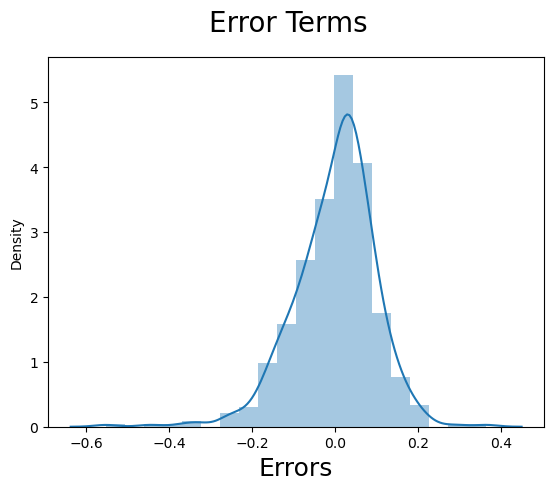

In [100]:
res = y_train - y_train_pred
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

## Step 6: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. lr_2 .

In [101]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

# using Transofrm here

In [102]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,False,False,...,False,False,False,False,False,False,True,False,False,False
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,False,False,...,False,False,False,False,True,False,False,False,True,False
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,False,False,...,False,False,True,False,False,False,True,False,False,True
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,True,False,...,False,False,False,False,True,False,False,False,False,False
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,False,False,...,False,False,True,False,False,False,False,False,True,False


In [103]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [104]:
y_test = df_test.pop('cnt')
X_test = df_test

In [105]:
# add a constant

X_test_sm = sm.add_constant(X_test)

In [106]:
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,False,False,...,False,False,False,False,False,False,True,False,False,False
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,False,False,...,False,False,False,False,True,False,False,False,True,False
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,False,False,...,False,False,True,False,False,False,True,False,False,True
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,True,False,...,False,False,False,False,True,False,False,False,False,False
152,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,False,False,...,False,False,True,False,False,False,False,False,True,False


In [107]:
X.columns

Index(['yr', 'windspeed', 'dec', 'feb', 'jan', 'may', 'nov', 'sep', 'mon',
       'sun', 'tue', 'Light_snowrain', 'Misty', 'spring', 'summer'],
      dtype='object')

In [108]:
X_test_sm.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may',
       'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [109]:
# Creating X_test_sm dataframe by dropping variables from X_test_sm
# columns dropped during test data analysis

X_test_sm = X_test_sm.drop(['holiday' , 'workingday', 'temp', 'atemp', 'hum',
                           'aug', 'june', 'july', 'mar', 'oct', 'sat', 'thu',
                           'wed', 'winter'], axis = 1)

In [110]:
# Making predictions using lr_2 

y_test_pred_lr2 = lr_2.predict(X_test_sm)

## Step 7: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

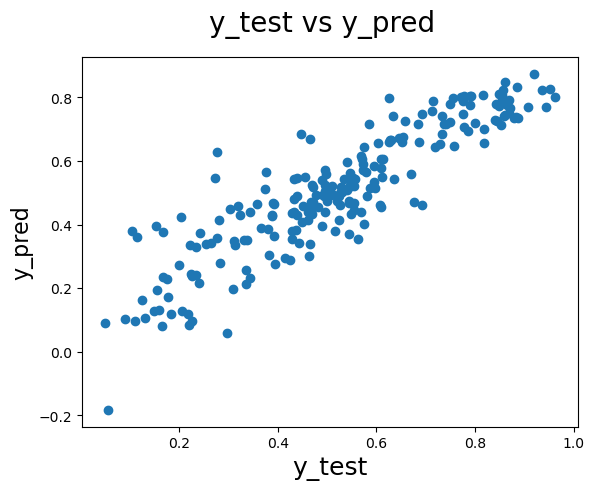

In [111]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred_lr2)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

In [112]:
round(lr_2.params,3)

const             0.599
yr                0.248
windspeed        -0.184
dec              -0.134
feb              -0.101
jan              -0.168
may               0.054
nov              -0.120
sep               0.051
mon              -0.034
sun              -0.057
tue              -0.015
Light_snowrain   -0.317
Misty            -0.088
spring           -0.198
summer           -0.061
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.248  \times  yr - 0.184 \times  windspeed - 0.134 \times dec - 0.101 \times feb - 0.168 \times jan + 0.054 \times may - 0.120 \times nov + 0.051 \times sep - 0.034 \times mon - 0.057 \times sun - 0.015 \times tue - 0.317 \times Light_snowrain - 0.088 \times Misty - 0.198 \times spring - 0.061 \times summer $

In [113]:
# Calculating Adjusted-R^2 value for the test dataset

r2 = r2_score(y_test, y_test_pred_lr2)


In [114]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),3)
adjusted_r2

0.766

In [115]:
# adjusted R2 obtained in train set is around 0.801 where as test set is 0.766

## Usig RFE

In [116]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    bool   
 9   dec             730 non-null    bool   
 10  feb             730 non-null    bool   
 11  jan             730 non-null    bool   
 12  july            730 non-null    bool   
 13  june            730 non-null    bool   
 14  mar             730 non-null    bool   
 15  may             730 non-null    bool   
 16  nov             730 non-null    bool   
 17  oct             730 non-null    boo

In [119]:
df_new.replace({False: 0, True: 1}, inplace=True)

In [120]:
df_train , df_test = train_test_split(df_new , train_size= 0.70 , test_size= 0.30 , random_state=333)

In [121]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              510 non-null    int64  
 1   holiday         510 non-null    int64  
 2   workingday      510 non-null    int64  
 3   temp            510 non-null    float64
 4   atemp           510 non-null    float64
 5   hum             510 non-null    float64
 6   windspeed       510 non-null    float64
 7   cnt             510 non-null    int64  
 8   aug             510 non-null    int64  
 9   dec             510 non-null    int64  
 10  feb             510 non-null    int64  
 11  jan             510 non-null    int64  
 12  july            510 non-null    int64  
 13  june            510 non-null    int64  
 14  mar             510 non-null    int64  
 15  may             510 non-null    int64  
 16  nov             510 non-null    int64  
 17  oct             510 non-null    int64 

In [122]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              219 non-null    int64  
 1   holiday         219 non-null    int64  
 2   workingday      219 non-null    int64  
 3   temp            219 non-null    float64
 4   atemp           219 non-null    float64
 5   hum             219 non-null    float64
 6   windspeed       219 non-null    float64
 7   cnt             219 non-null    int64  
 8   aug             219 non-null    int64  
 9   dec             219 non-null    int64  
 10  feb             219 non-null    int64  
 11  jan             219 non-null    int64  
 12  july            219 non-null    int64  
 13  june            219 non-null    int64  
 14  mar             219 non-null    int64  
 15  may             219 non-null    int64  
 16  nov             219 non-null    int64  
 17  oct             219 non-null    int64  

In [123]:
num_vars

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

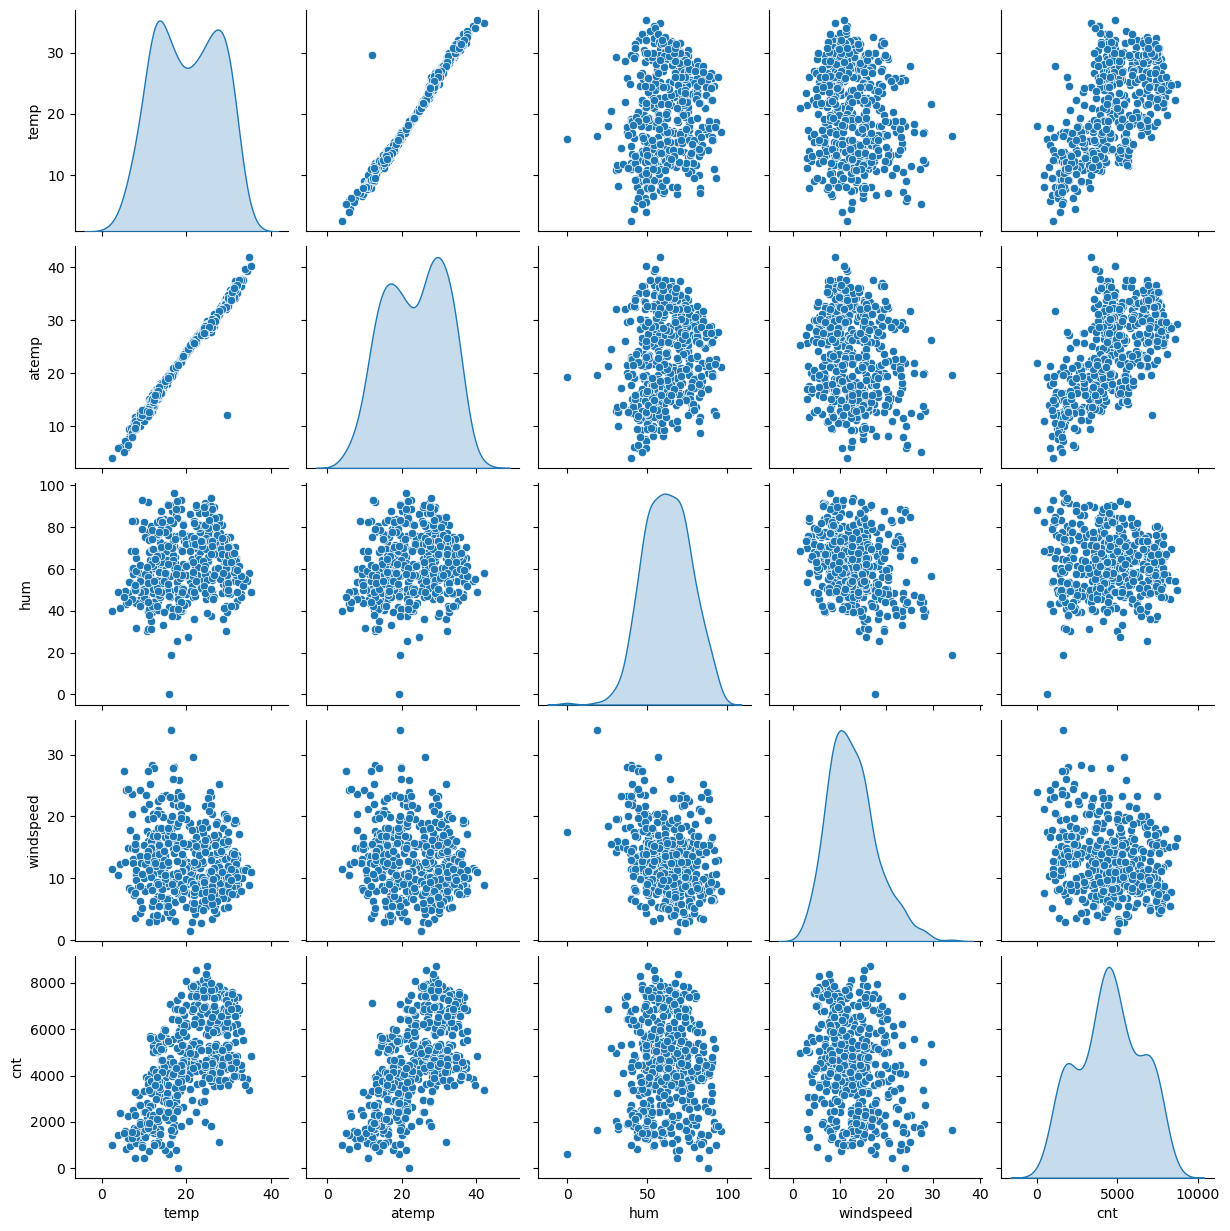

In [124]:
bike_num_var = df_train[num_vars]
sns.pairplot(bike_num_var , diag_kind='kde')

In [125]:
scaler = MinMaxScaler()

In [126]:
#Applying scaler to numeric variables

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [127]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,0,0,...,0,1,0,0,0,0,0,0,1,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,1,0,0,0,0,0,0,0,0,1
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,1,0,...,0,0,0,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,1,...,0,1,0,0,0,0,1,0,0,1
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,1,0,0,0,0,0,1,0,0


## Building Model

Dividing Data into , X and Y sets for model Building

In [128]:
y_train = df_train.pop('cnt')
X_train = df_train

In [130]:
lm = LinearRegression()

lm.fit(X_train, y_train)
rfe = RFE(lm ,n_features_to_select=15)
rfe = rfe.fit(X_train , y_train)

In [131]:
list(zip(X_train , rfe.support_ , rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 11),
 ('dec', False, 2),
 ('feb', False, 5),
 ('jan', False, 4),
 ('july', True, 1),
 ('june', False, 13),
 ('mar', False, 8),
 ('may', False, 6),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 7),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 14),
 ('tue', False, 10),
 ('wed', False, 15),
 ('Light_snowrain', True, 1),
 ('Misty', False, 3),
 ('spring', True, 1),
 ('summer', False, 9),
 ('winter', True, 1)]

In [132]:
fn_calcVIF(X_train)

,Features,VIF
2,workingday,91.162
3,temp,65.474
4,atemp,55.470
19,sat,20.086
20,sun,19.331
26,spring,11.062
27,summer,8.402
28,winter,8.314
15,nov,6.880
7,aug,6.595


In [133]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'july', 'nov', 'sep', 'sat', 'sun', 'Light_snowrain', 'spring',
       'winter'],
      dtype='object')

In [134]:
X_train.columns[~rfe.support_]

Index(['aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'oct', 'mon', 'thu',
       'tue', 'wed', 'Misty', 'summer'],
      dtype='object')

In [135]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_lm1 = sm.add_constant(X_train_rfe)
lr_rfe = sm.OLS(y_train , X_train_lm1).fit()

In [136]:
lr_rfe.params

const             0.312904
yr                0.226894
holiday           0.052741
workingday        0.093657
temp              0.322830
atemp             0.177161
hum              -0.277682
windspeed        -0.195184
july             -0.053433
nov              -0.041972
sep               0.063466
sat               0.108550
sun               0.057956
Light_snowrain   -0.217674
spring           -0.115779
winter            0.069969
dtype: float64

In [137]:
lr_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     173.2
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.93e-180
Time:                        06:53:02   Log-Likelihood:                 491.80
No. Observations:                 510   AIC:                            -953.6
Df Residuals:                     495   BIC:                            -890.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3129      0.027     11.762      0.000       0.261       0.365
yr                 0.2269      0.008     26.935      0.000       0.210       0.243
holiday            0.0527      0.023      2.277      0.023       0.007       0.098
workingday         0.0937      0.010      9.536      0.000       0.074       0.113
temp               0.3228      0.133      2.429      0.015       0.062       0.584
atemp              0.1772      0.140      1.269      0.205      -0.097       0.451
hum               -0.2777      0.031     -8.860      0.000      -0.339      -0.216
windspeed         -0.1952      0.029     -6.831      0.000      -0.251      -0.139
july              -0.0534      0.018     -3.032      0.003      -0.088      -0.019
nov               -0.0420      0.018     -2.296      0.022      -0.078      -0.006
sep                0.0635      0.016      3.990      0.000       0.032       0.095
sat                0.1086      0.012      8.956      0.000       0.085       0.132
sun                0.0580      0.012      4.707      0.000       0.034       0.082
Light_snowrain    -0.2177      0.028     -7.868      0.000      -0.272      -0.163
spring            -0.1158      0.016     -7.387      0.000      -0.147      -0.085
winter             0.0700      0.014      5.009      0.000       0.043       0.097
==============================================================================
Omnibus:                       71.434   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.556
Skew:                          -0.775   Prob(JB):                     2.03e-33
Kurtosis:                       5.164   Cond. No.                     3.41e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.34e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [138]:
# dropping atemp

X_train_new = X_train_rfe.drop(['atemp'] , axis = 1)
X_train_lm1 = sm.add_constant(X_train_new)
lr_rfe = sm.OLS(y_train , X_train_lm1).fit()
lr_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     186.2
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          3.08e-181
Time:                        06:55:49   Log-Likelihood:                 490.97
No. Observations:                 510   AIC:                            -953.9
Df Residuals:                     496   BIC:                            -894.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3158      0.027     11.909      0.000       0.264       0.368
yr                 0.2269      0.008     26.919      0.000       0.210       0.243
holiday            0.0527      0.023      2.272      0.024       0.007       0.098
workingday         0.0945      0.010      9.639      0.000       0.075       0.114
temp               0.4866      0.032     15.394      0.000       0.425       0.549
hum               -0.2761      0.031     -8.810      0.000      -0.338      -0.214
windspeed         -0.2016      0.028     -7.163      0.000      -0.257      -0.146
july              -0.0535      0.018     -3.037      0.003      -0.088      -0.019
nov               -0.0426      0.018     -2.328      0.020      -0.078      -0.007
sep                0.0623      0.016      3.923      0.000       0.031       0.094
sat                0.1096      0.012      9.062      0.000       0.086       0.133
sun                0.0590      0.012      4.803      0.000       0.035       0.083
Light_snowrain    -0.2186      0.028     -7.901      0.000      -0.273      -0.164
spring            -0.1161      0.016     -7.401      0.000      -0.147      -0.085
winter             0.0714      0.014      5.121      0.000       0.044       0.099
==============================================================================
Omnibus:                       69.653   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.115
Skew:                          -0.759   Prob(JB):                     1.87e-32
Kurtosis:                       5.138   Cond. No.                     3.21e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.38e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [139]:
fn_calcVIF(X_train_new)

,Features,VIF
2,workingday,41.875
9,sat,9.911
10,sun,9.491
3,temp,3.009
12,spring,2.672
1,holiday,2.492
13,winter,2.064
7,nov,1.532
6,july,1.305
4,hum,1.276


In [140]:
#dropping workingday

X_train_new = X_train_new.drop(['workingday'] , axis = 1)
X_train_lm1 = sm.add_constant(X_train_new)
lr_rfe = sm.OLS(y_train , X_train_lm1).fit()
lr_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     186.2
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          3.08e-181
Time:                        06:57:32   Log-Likelihood:                 490.97
No. Observations:                 510   AIC:                            -953.9
Df Residuals:                     496   BIC:                            -894.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4103      0.033     12.625      0.000       0.346       0.474
yr                 0.2269      0.008     26.919      0.000       0.210       0.243
holiday           -0.0419      0.028     -1.507      0.132      -0.096       0.013
temp               0.4866      0.032     15.394      0.000       0.425       0.549
hum               -0.2761      0.031     -8.810      0.000      -0.338      -0.214
windspeed         -0.2016      0.028     -7.163      0.000      -0.257      -0.146
july              -0.0535      0.018     -3.037      0.003      -0.088      -0.019
nov               -0.0426      0.018     -2.328      0.020      -0.078      -0.007
sep                0.0623      0.016      3.923      0.000       0.031       0.094
sat                0.0151      0.012      1.276      0.203      -0.008       0.038
sun               -0.0355      0.012     -2.928      0.004      -0.059      -0.012
Light_snowrain    -0.2186      0.028     -7.901      0.000      -0.273      -0.164
spring            -0.1161      0.016     -7.401      0.000      -0.147      -0.085
winter             0.0714      0.014      5.121      0.000       0.044       0.099
==============================================================================
Omnibus:                       69.653   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.115
Skew:                          -0.759   Prob(JB):                     1.87e-32
Kurtosis:                       5.138   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
fn_calcVIF(X_train_new)

,Features,VIF
3,hum,14.720
2,temp,13.191
4,windspeed,5.049
12,winter,2.439
11,spring,2.430
0,yr,2.039
6,nov,1.637
5,july,1.412
8,sat,1.222
9,sun,1.214


In [142]:
# hum

X_train_new = X_train_new.drop(['hum'] , axis = 1)
X_train_lm1 = sm.add_constant(X_train_new)
lr_rfe = sm.OLS(y_train , X_train_lm1).fit()
print(lr_rfe.summary())
fn_calcVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     169.2
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          8.85e-167
Time:                        06:58:25   Log-Likelihood:                 453.90
No. Observations:                 510   AIC:                            -881.8
Df Residuals:                     497   BIC:                            -826.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2258      0.027      8.

,Features,VIF
3,windspeed,5.006
2,temp,4.945
0,yr,2.036
11,winter,1.916
10,spring,1.718
5,nov,1.636
4,july,1.356
7,sat,1.215
8,sun,1.206
6,sep,1.201


In [143]:
#windspeed

X_train_new = X_train_new.drop(['windspeed'] , axis = 1)
X_train_lm1 = sm.add_constant(X_train_new)
lr_rfe = sm.OLS(y_train , X_train_lm1).fit()
print(lr_rfe.summary())
fn_calcVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          3.20e-163
Time:                        06:59:13   Log-Likelihood:                 442.76
No. Observations:                 510   AIC:                            -861.5
Df Residuals:                     498   BIC:                            -810.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1697      0.024      6.

,Features,VIF
2,temp,2.718
0,yr,2.019
10,winter,1.906
4,nov,1.598
3,july,1.319
9,spring,1.238
6,sat,1.201
7,sun,1.197
5,sep,1.192
1,holiday,1.053


In [144]:
# now VIFs are less than 5, so we can take this as final RFE model

In [146]:
round(lr_rfe.params , 3)

const             0.170
yr                0.233
holiday          -0.043
temp              0.468
july             -0.030
nov              -0.035
sep               0.058
sat               0.012
sun              -0.038
Light_snowrain   -0.298
spring           -0.114
winter            0.068
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.233  \times  yr - 0.043 \times  holiday + 0.468 \times temp - 0.030 \times july - 0.035 \times nov + 0.058 \times sep - 0.012 \times sat - 0.038 \times sun - 0.298 \times light_snowrain - 0.114 \times spring + 0.068 \times winter $

## Residual Analysis

In [148]:
y_train_pred = lr_rfe.predict(X_train_lm1)

Text(0.5, 9.444444444444438, 'Errors')

<Figure size 640x480 with 0 Axes>

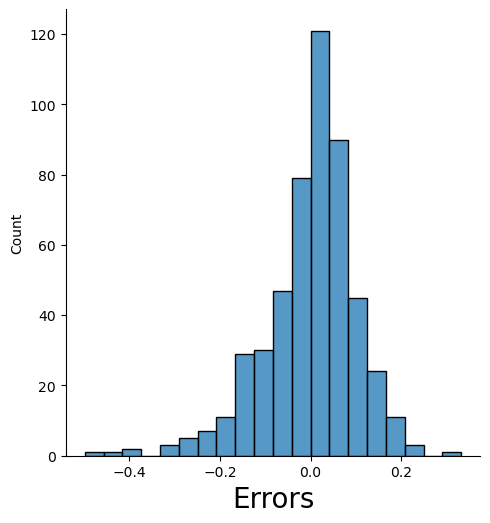

In [151]:
res = y_train - y_train_pred
fig = plt.figure()
sns.displot((res), bins = 20)
fig.suptitle('Error Terms' ,fontsize = 20)
plt.xlabel('Errors', fontsize = 20)

# Make Predictions using final Model lr_rfe

In [152]:
num_vars

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [153]:
df_test[num_vars] = scaler.transform(df_test[num_vars]) 

In [154]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,1,0,0,0,0,0,1,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,0,0,...,1,0,0,0,0,0,0,0,1,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,0,...,0,1,0,0,0,0,0,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,0,0,...,0,1,0,0,0,0,0,0,1,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,1,...,0,0,0,1,0,0,1,0,0,1


In [155]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.684932,0.551225,0.527528,0.662567,0.346706,0.518889,0.054795,0.105023,...,0.127854,0.146119,0.173516,0.146119,0.118721,0.036530,0.324201,0.237443,0.264840,0.251142
std,0.501098,0.198967,0.465607,0.229463,0.215434,0.143562,0.159553,0.219953,0.228100,0.307285,...,0.334692,0.354034,0.379560,0.354034,0.324202,0.188034,0.469148,0.426491,0.442259,0.434663
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.500000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [156]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              219 non-null    int64  
 1   holiday         219 non-null    int64  
 2   workingday      219 non-null    int64  
 3   temp            219 non-null    float64
 4   atemp           219 non-null    float64
 5   hum             219 non-null    float64
 6   windspeed       219 non-null    float64
 7   aug             219 non-null    int64  
 8   dec             219 non-null    int64  
 9   feb             219 non-null    int64  
 10  jan             219 non-null    int64  
 11  july            219 non-null    int64  
 12  june            219 non-null    int64  
 13  mar             219 non-null    int64  
 14  may             219 non-null    int64  
 15  nov             219 non-null    int64  
 16  oct             219 non-null    int64  
 17  sep             219 non-null    int64  

In [157]:
# selecting all columns used in Training Data set
col_test = X_train_new.columns
col_test

Index(['yr', 'holiday', 'temp', 'july', 'nov', 'sep', 'sat', 'sun',
       'Light_snowrain', 'spring', 'winter'],
      dtype='object')

In [158]:
X_test = X_test[col_test]
X_test_lm = sm.add_constant(X_test)
X_test_lm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           219 non-null    float64
 1   yr              219 non-null    int64  
 2   holiday         219 non-null    int64  
 3   temp            219 non-null    float64
 4   july            219 non-null    int64  
 5   nov             219 non-null    int64  
 6   sep             219 non-null    int64  
 7   sat             219 non-null    int64  
 8   sun             219 non-null    int64  
 9   Light_snowrain  219 non-null    int64  
 10  spring          219 non-null    int64  
 11  winter          219 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 22.2 KB


In [160]:
y_pred = lr_rfe.predict(X_test_lm)

# Model Evaluation

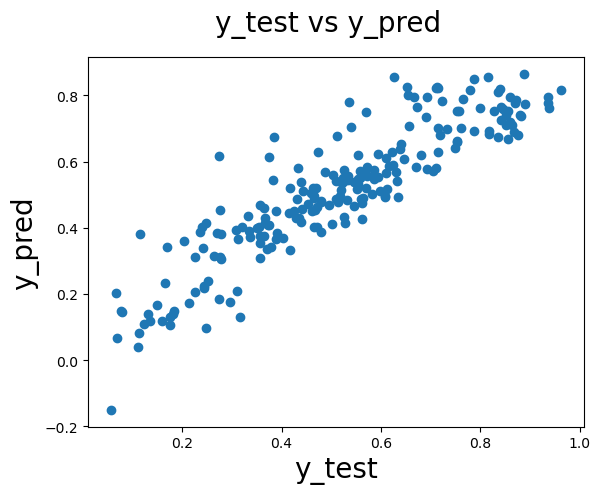

In [161]:
fig = plt.figure()
plt.scatter(y_test , y_pred)
fig.suptitle('y_test vs y_pred' , fontsize = 20)
plt.xlabel('y_test', fontsize = 20)
plt.ylabel('y_pred', fontsize = 20)
plt.show()

# R^2 Value Calculation

In [162]:
r2_score(y_test , y_pred)

0.8057032215574229

In [163]:
# Shape of X_test
X_test.shape

(219, 11)

In [164]:
# n = num of rows present in X
n = X_test.shape[0]
n

219

In [165]:
# p (Predictors) =  no of features , shape along axis 1

p = X_test.shape[1]
p

11

In [166]:
adjusted_r2_rfe = 1-(1-r2) * (n-1)/(n-p-1)
adjusted_r2_rfe

0.7859701332364561

FInal Results

- Train R^2 = 0.795
- Train adjusted R^2 = 0.790

- Test R^2 = 0.805
- Test adjusted R^2 = 0.785

In [167]:
round(lr_rfe.params , 3)

const             0.170
yr                0.233
holiday          -0.043
temp              0.468
july             -0.030
nov              -0.035
sep               0.058
sat               0.012
sun              -0.038
Light_snowrain   -0.298
spring           -0.114
winter            0.068
dtype: float64

##  Model Results

As per final Model : 
    - Temp is a feature where it has coeeficient as 0.468, so a unit incr in temp, increase bike booking by 0.468 units
    - Year is a feature where it has coeeficient as 0.233, so a unit incr in Year, increase bike booking by 0.233 units
    - Light_snowrain is a feature where it has a negative coeeficient as 0.298. so it decr the booking by 0.298 units
It is suggested that, consider these varibales first while planning to achieve efficient Booking